In [1]:
import pandas as pd
import numpy as np
import scipy as sc


import warnings 
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sbs
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_excel('New_Fundamental_Data.xlsx')
dd = pd.read_excel('New_Market_Data.xlsx')

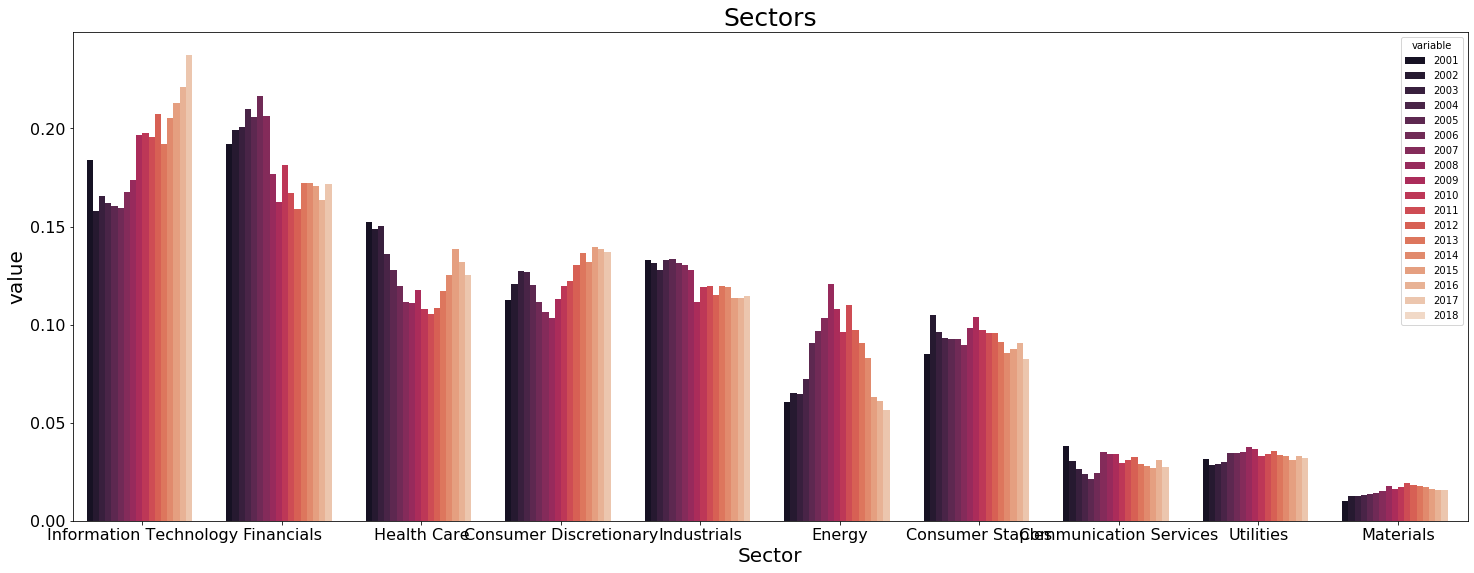

In [3]:
new = pd.DataFrame()
sectors = df[['Sector', 'label']]
sectors = sectors.drop_duplicates(subset = 'label').reset_index()[['Sector', 'label']]
diagram = dd[['Mount', 'label', 'MK' ]]
diagram = diagram.rename(columns = {'Mount': 'DataDate'})
diagram = pd.merge(diagram, sectors, how='left', on='label')
diagram = diagram.where(diagram.Sector != 'Real Estate', 'Financial')

for i in range(1,19):
    new['Sector'] = diagram[diagram.DataDate.dt.year == 2016].groupby('Sector')['MK'].sum().reset_index().Sector
    new['period_' + str(2000+i)] = diagram[diagram.DataDate.dt.year == 2000+i].groupby('Sector')['MK']\
                                                                    .sum().reset_index().MK
    
    new['total_' + str(i)] = new['period_' + str(2000+i)].sum(axis = 0)
    new[str(2000+i)] = new['period_' + str(2000+i)] / new['total_' + str(i)]


list = [str(2000+i) for i in range(1,19)]
list.append('Sector')
wow = pd.melt(new.loc[:, list], id_vars = ['Sector'])
wow = wow.sort_values(by = 'value', ascending =False)

%config InlineBackend.figure_format = 'png' 

plt.figure( figsize=(25, 9))
plt.title("Sectors", fontsize = 25)
plt.xlabel('y', fontsize = 20)
plt.ylabel('y', fontsize = 20)
sbs.barplot(x = 'Sector', y = 'value', hue = 'variable', palette="rocket", data = wow)
plt.xticks()

plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

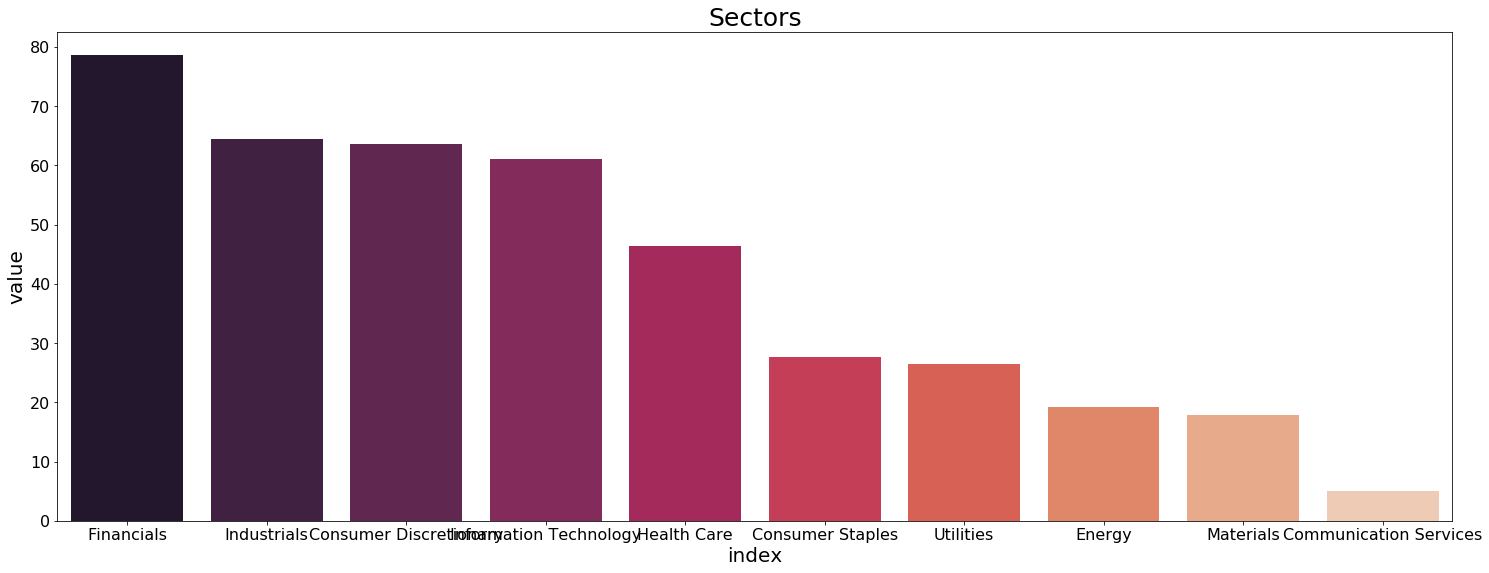

In [4]:
new = pd.DataFrame()
new = pd.DataFrame(index = diagram[diagram.DataDate == str(2000+4) + '-01-31'].Sector.value_counts().index )
for i in  range(1,18):
    z = diagram[diagram.DataDate == str(2000+i) + '-01-31'].Sector.value_counts()
    new[str(2000+i)]= np.array(z)
new = new.reset_index().melt( id_vars = ['index'])
new = new.groupby('index').mean().reset_index()
new = new.sort_values(by = 'value', ascending =False)
plt.figure( figsize=(25, 9))
plt.title("Sectors", fontsize = 25)
plt.xlabel('y', fontsize = 20)
plt.ylabel('y', fontsize = 20)
sbs.barplot(x = 'index', y = 'value', palette="rocket", data = new)
plt.xticks()

plt.tick_params(axis='both', which='major', labelsize=16)